In [1]:
import fit_lc
import matplotlib.pylab as plot
import numpy as np
import time
from datetime import datetime
import fit_functions
import judy_astropy as jap

In [2]:
### GRB specifics
dir='/Users/jracusin/GRBs/GRB180720B/'
grb='GRB 180720B'
trigtime=datetime(2018,7,20,14,21,44)
futuredates=np.array([datetime(2018,8,1),datetime(2018,9,1),datetime(2018,11,1),datetime(2019,3,1),datetime(2019,9,1),datetime(2020,6,1)])
### XRT spectral fit
pl=1.83
nh=3.93e20+2.4e21
obscounts2flux=3.86e-11
chandrafact=4.8e10

In [10]:
lc=fit_lc.read_lc(dir=dir)
p=fit_lc.read_lcfit(dir=dir)
print p.par,p.perror

 [18134.3564037906, 0.7684362174896282, 3885.5532741272878, 1.3561536391857794, 1817.692481864548, 61.89259678419647, 50.5785242825893, 24.480358572154064] [[7.61693911e+02 7.61693911e+02]
 [6.01797425e-03 6.01797425e-03]
 [8.73696824e+01 8.73696824e+01]
 [6.29481535e-03 6.29481535e-03]
 [6.14226527e+01 6.14226527e+01]
 [4.18828288e+00 4.18828288e+00]
 [1.75165169e+01 1.75165169e+01]
 [1.54577371e+00 1.54577371e+00]]


In [4]:
print trigtime
today=datetime.today()
print today
td=today-trigtime
print td
print td.days*86400+td.seconds
ftd=np.array(futuredates-trigtime)
print ftd[0].seconds

2018-07-20 14:21:44
2018-07-27 15:59:54.207544
7 days, 1:38:10.207544
610690
34696


In [5]:
#flux conversion factor
fluxfact=jap.pimms([0.3,10],[0.5,8],pl,nh)*obscounts2flux#*chandrafact
print fluxfact

/Users/jracusin/anaconda/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


3.39180924402e-11


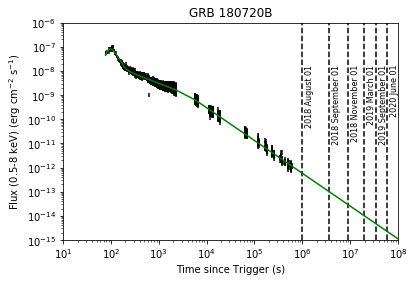

In [6]:
w=np.where(lc['Ratepos'] > 0.)[0]
yerr=np.array([-lc['Rateneg'][w],lc['Ratepos'][w]])*fluxfact
fig,ax=plot.subplots()
plot.errorbar(lc['Time'][w],lc['Rate'][w]*fluxfact,xerr=[-lc['T_-ve'][w],lc['T_+ve'][w]],\
    yerr=yerr,linestyle='None',capsize=0,color='black')
#fit_lc.plot_lcfit(lc=lc,p=p,resid=False,noshow=True)
for i in range(len(futuredates)):
    d=ftd[i]
    x=d.days*86400.+d.seconds
    plot.plot([x,x],[1e-15,1e-6],linestyle='--',color='black')
    fdwords=str(futuredates[i].year)+' '+futuredates[i].strftime('%B')+' '+futuredates[i].strftime('%d')
    plot.annotate(fdwords,xy=(x*1.15,1e-8),rotation=90,fontsize=8)

t=np.append(np.array(lc['Time'][w]),1e8)
yfit=fit_functions.call_function(p.model,t,*p.par)
plot.plot(t,yfit*fluxfact,color='green')
plot.title(grb)
plot.xscale('log')
plot.yscale('log')
plot.xlim([10,1e8])
plot.ylim([1e-15,1e-6])
plot.xlabel('Time since Trigger (s)')
plot.ylabel(r'Flux (0.5-8 keV) (erg cm$^{-2}$ s$^{-1}$)')
plot.savefig(dir+'Chandra_prediction.pdf')
plot.show()